In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_excel("Fertility Rate Per Woman and Male Education Relationship Data 2013.xlsx")
df.head(15)

,Country Name,"Fertility rate, total (births per woman) 2013","Mean years of schooling, male (years) 2013",GDP per capita (current US$) 2013
0,Afghanistan,5.359,5.1,637.165523
1,Albania,1.690,9.5,4413.060861
2,Algeria,2.990,7.8,5499.581487
3,Argentina,2.322,9.6,13080.254732
4,Armenia,1.728,10.8,3838.185801
5,Australia,1.855,13.1,68150.107041
6,Austria,1.440,10.7,50716.708706
7,Azerbaijan,1.980,11.2,7875.756953
8,"Bahamas, The",1.810,11.1,28768.029894
9,Bahrain,2.098,9.6,24744.296959


In [4]:
df  # Check data frame.

,Country Name,"Fertility rate, total (births per woman) 2013","Mean years of schooling, male (years) 2013",GDP per capita (current US$) 2013
0,Afghanistan,5.359,5.1,637.165523
1,Albania,1.690,9.5,4413.060861
2,Algeria,2.990,7.8,5499.581487
3,Argentina,2.322,9.6,13080.254732
4,Armenia,1.728,10.8,3838.185801
...,...,...,...,...
159,Vietnam,1.978,5.7,1886.671896
160,"Yemen, Rep.",4.326,3.8,1607.152365
161,Zambia,5.132,7.2,1878.907001
162,Zimbabwe,4.030,7.8,1430.000818


In [5]:
mean_df = df.mean()
print(mean_df)

Fertility rate, total (births per woman) 2013        2.798765
Mean years of schooling, male (years) 2013           8.422561
GDP per capita (current US$) 2013                15059.599438
dtype: float64


In [6]:
df['GDP per capita (current US$) 2013']

0        637.165523
1       4413.060861
2       5499.581487
3      13080.254732
4       3838.185801
           ...     
159     1886.671896
160     1607.152365
161     1878.907001
162     1430.000818
163    21973.000000
Name: GDP per capita (current US$) 2013, Length: 164, dtype: float64

In [7]:
log_gdp = np.log(df['GDP per capita (current US$) 2013'])  # log(GDP per capita (current US$) 2013)

In [8]:
log_gdp

0      6.457029
1      8.392324
2      8.612427
3      9.478859
4      8.252755
         ...   
159    7.542570
160    7.382219
161    7.538446
162    7.265430
163    9.997570
Name: GDP per capita (current US$) 2013, Length: 164, dtype: float64

In [9]:
df.insert(4, column="log(GDP)", value=log_gdp)  # New colomn of log(GDP)

In [10]:
df

,Country Name,"Fertility rate, total (births per woman) 2013","Mean years of schooling, male (years) 2013",GDP per capita (current US$) 2013,log(GDP)
0,Afghanistan,5.359,5.1,637.165523,6.457029
1,Albania,1.690,9.5,4413.060861,8.392324
2,Algeria,2.990,7.8,5499.581487,8.612427
3,Argentina,2.322,9.6,13080.254732,9.478859
4,Armenia,1.728,10.8,3838.185801,8.252755
...,...,...,...,...,...
159,Vietnam,1.978,5.7,1886.671896,7.542570
160,"Yemen, Rep.",4.326,3.8,1607.152365,7.382219
161,Zambia,5.132,7.2,1878.907001,7.538446
162,Zimbabwe,4.030,7.8,1430.000818,7.265430


In [11]:
print(df['Fertility rate, total (births per woman) 2013'])

0      5.359
1      1.690
2      2.990
3      2.322
4      1.728
       ...  
159    1.978
160    4.326
161    5.132
162    4.030
163    1.070
Name: Fertility rate, total (births per woman) 2013, Length: 164, dtype: float64


In [12]:
print(df['GDP per capita (current US$) 2013'])

0        637.165523
1       4413.060861
2       5499.581487
3      13080.254732
4       3838.185801
           ...     
159     1886.671896
160     1607.152365
161     1878.907001
162     1430.000818
163    21973.000000
Name: GDP per capita (current US$) 2013, Length: 164, dtype: float64


In [13]:
# Visualization 1
# Create a plot of GDP per capita (current US$) and Fertility rate, total (births per woman).

In [14]:
X = df['GDP per capita (current US$) 2013']
y = df['Fertility rate, total (births per woman) 2013']

In [15]:
length = len(df['Country Name'])

In [16]:
country_name = df['Country Name']

In [17]:
annotations=df['Country Name']

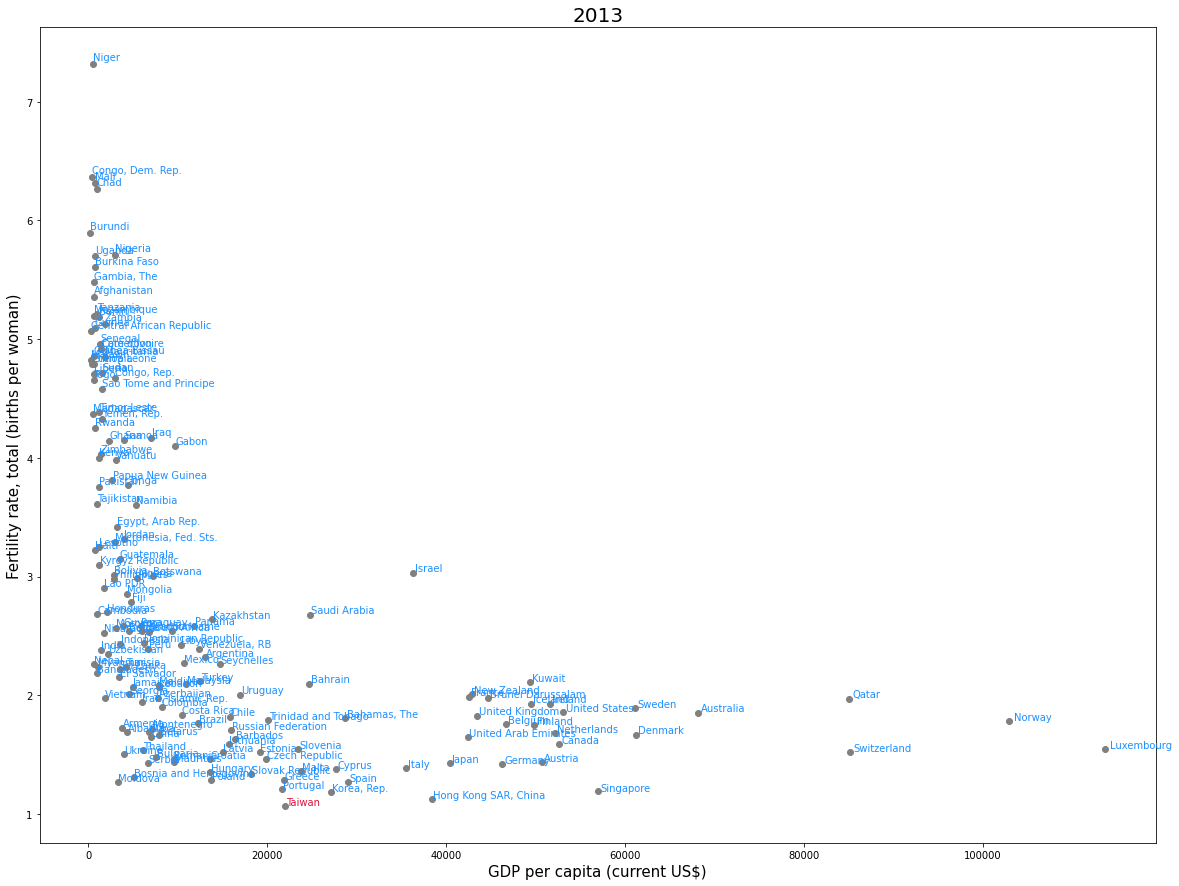

In [18]:
# Visualization of GDP per capita (current US$) 2013 and Fertility rate, total (births per woman) 2013.
plt.figure(figsize = (20, 15))

plt.scatter(X, y, color="gray")
plt.title("2013", fontsize=20)
plt.xlabel("GDP per capita (current US$)", fontsize=15)
plt.ylabel("Fertility rate, total (births per woman)", fontsize=15)

# Add country name tag.
for i, label in enumerate(annotations):
    if country_name[i] == "Taiwan":
        plt.annotate(label, (X[i], y[i]), xytext=(1.005*X[i], 1.005*y[i]), color="crimson")
    else:
        plt.annotate(label, (X[i], y[i]), xytext=(1.005*X[i], 1.005*y[i]), color="dodgerblue")
plt.savefig('1.png', dpi=600)
    
# # Add country name tag.
# for i in range(length):
#     if country_name[i] == "Taiwan":
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "crimson", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)
#     else:
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "dodgerblue", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)

plt.show()

In [19]:
# Visualization 2
# Create a plot of log(GDP per capita (current US$)) and Fertility rate, total (births per woman).

In [20]:
X = df['log(GDP)']
y = df['Fertility rate, total (births per woman) 2013']

In [21]:
length = len(df['Country Name'])

In [22]:
country_name = df['Country Name']

In [23]:
annotations=df['Country Name']

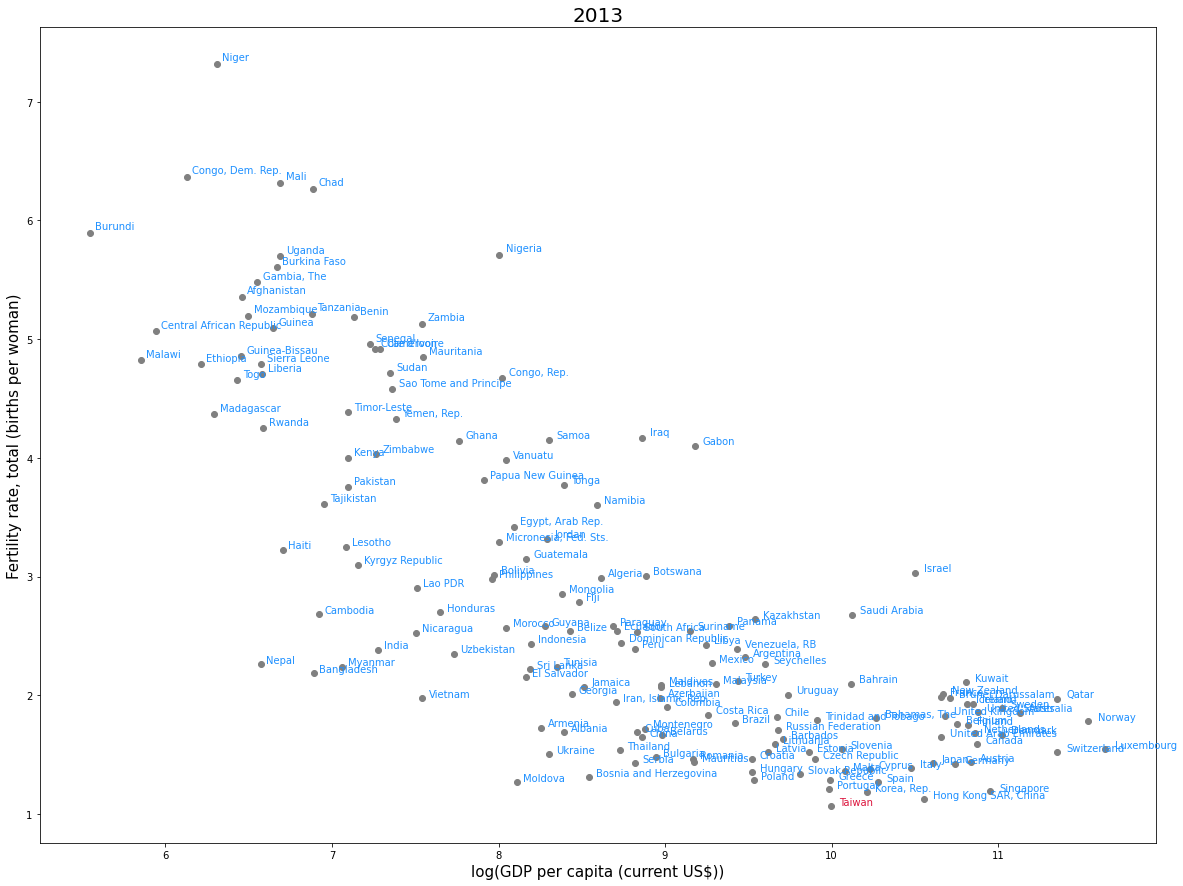

In [24]:
# Visualization of log(GDP per capita (current US$)) and Fertility rate, total (births per woman).
plt.figure(figsize = (20, 15))

plt.scatter(X, y, color="gray")
plt.title("2013", fontsize=20)
plt.xlabel("log(GDP per capita (current US$))", fontsize=15)
plt.ylabel("Fertility rate, total (births per woman)", fontsize=15)

# Add country name tag.
for i, label in enumerate(annotations):
    if country_name[i] == "Taiwan":
        plt.annotate(label, (X[i], y[i]), xytext=(1.005*X[i], 1.005*y[i]), color="crimson")
    else:
        plt.annotate(label, (X[i], y[i]), xytext=(1.005*X[i], 1.005*y[i]), color="dodgerblue")
plt.savefig('2.png', dpi=600)

# # Add country name tag.
# for i in range(length):
#     if country_name[i] == "Taiwan":
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "red", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)
#     else:
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "blue", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)

plt.show()

In [25]:
# Visualization 3
# Create a plot of Mean years of schooling (male) and Fertility rate, total (births per woman).

In [26]:
X = df['Mean years of schooling, male (years) 2013']
y = df['Fertility rate, total (births per woman) 2013']

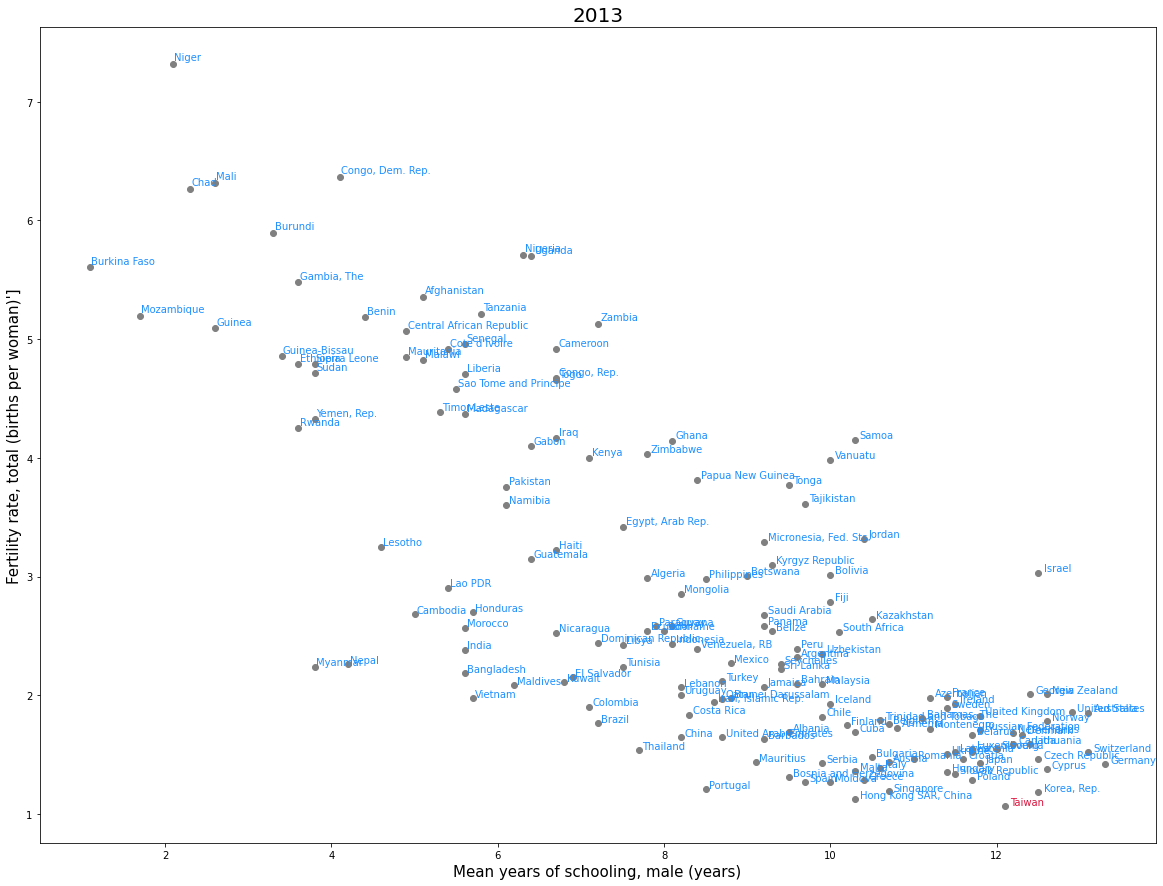

In [27]:
# Visualization of GDP per capita (current US$) and Fertility rate, total (births per woman).
plt.figure(figsize = (20, 15))

plt.scatter(X, y, color="gray")
plt.title("2013", fontsize=20)
plt.xlabel("Mean years of schooling, male (years)", fontsize=15)
plt.ylabel("Fertility rate, total (births per woman)']", fontsize=15)

# Add country name tag.
for i, label in enumerate(annotations):
    if country_name[i] == "Taiwan":
        plt.annotate(label, (X[i], y[i]), xytext=(1.005*X[i], 1.005*y[i]), color="crimson")
    else:
        plt.annotate(label, (X[i], y[i]), xytext=(1.005*X[i], 1.005*y[i]), color="dodgerblue")
plt.savefig('3.png', dpi=600)

# # Add country name tag.
# for i in range(length):
#     if country_name[i] == "Taiwan":
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "blue", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)
#     else:
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "red", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)

plt.show()

In [28]:
# Visualization 4
# Create a plot of log(GDP per capita (current US$)) and Mean years of schooling, male (years).

In [29]:
X = df['log(GDP)']
y = df['Mean years of schooling, male (years) 2013']

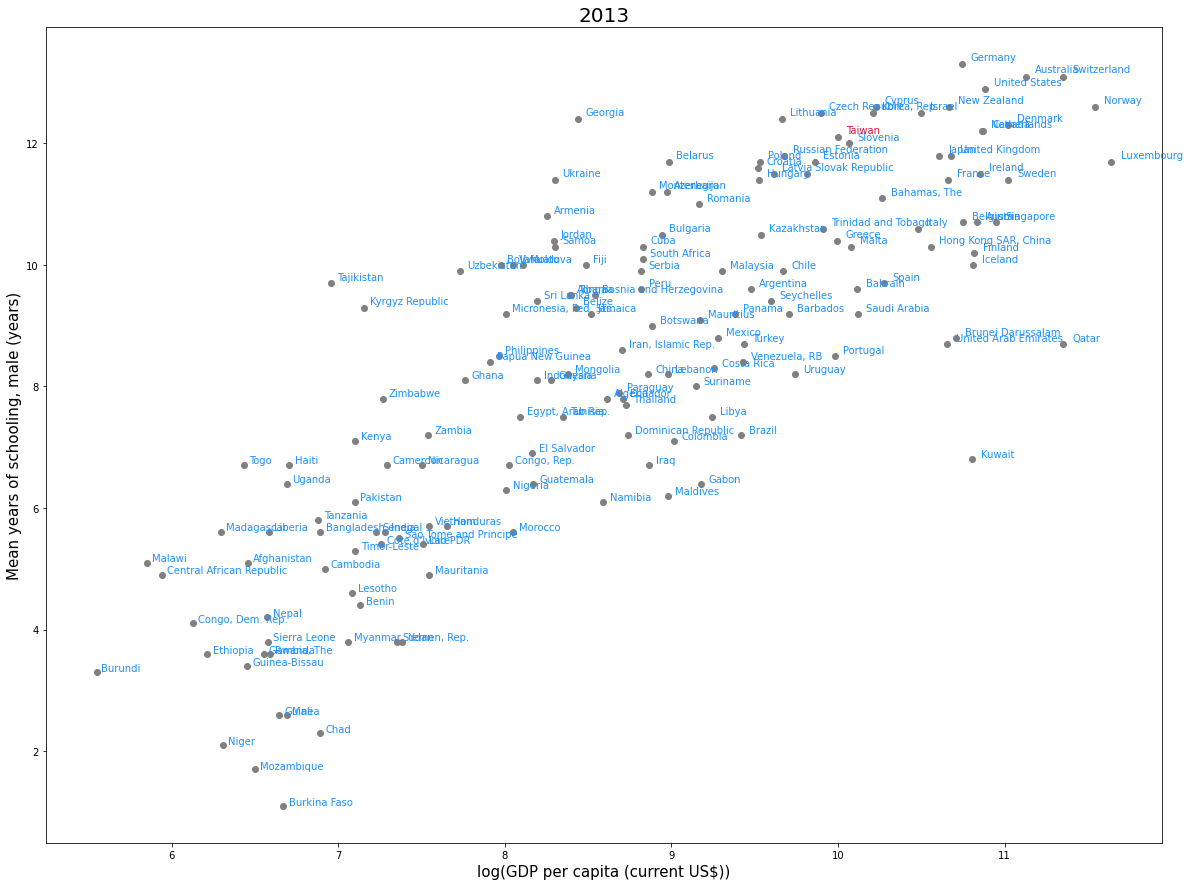

In [30]:
# Visualization of GDP per capita (current US$) and Fertility rate, total (births per woman).
plt.figure(figsize = (20, 15))

plt.scatter(X, y, color="gray")
plt.title("2013", fontsize=20)
plt.xlabel("log(GDP per capita (current US$))", fontsize=15)
plt.ylabel("Mean years of schooling, male (years)", fontsize=15)

# Add country name tag.
for i, label in enumerate(annotations):
    if country_name[i] == "Taiwan":
        plt.annotate(label, (X[i], y[i]), xytext=(1.005*X[i], 1.005*y[i]), color="crimson")
    else:
        plt.annotate(label, (X[i], y[i]), xytext=(1.005*X[i], 1.005*y[i]), color="dodgerblue")
plt.savefig('5.png', dpi=600)

# # Add country name tag.
# for i in range(length):
#     if country_name[i] == "Taiwan":
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "blue", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)
#     else:
#         plt.text(X[i], y[i]*1.02, country_name[i], fontsize=10, color = "red", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)

plt.show()

In [31]:
# Build rdinary least square method model.

In [32]:
df

,Country Name,"Fertility rate, total (births per woman) 2013","Mean years of schooling, male (years) 2013",GDP per capita (current US$) 2013,log(GDP)
0,Afghanistan,5.359,5.1,637.165523,6.457029
1,Albania,1.690,9.5,4413.060861,8.392324
2,Algeria,2.990,7.8,5499.581487,8.612427
3,Argentina,2.322,9.6,13080.254732,9.478859
4,Armenia,1.728,10.8,3838.185801,8.252755
...,...,...,...,...,...
159,Vietnam,1.978,5.7,1886.671896,7.542570
160,"Yemen, Rep.",4.326,3.8,1607.152365,7.382219
161,Zambia,5.132,7.2,1878.907001,7.538446
162,Zimbabwe,4.030,7.8,1430.000818,7.265430


In [33]:
data = np.array(df)

In [34]:
data

array([['Afghanistan', 5.359, 5.1, 637.165523187024, 6.45702946983482],
       ['Albania', 1.69, 9.5, 4413.06086120676, 8.392323800519737],
       ['Algeria', 2.99, 7.8, 5499.58148704572, 8.612427275060908],
       ['Argentina', 2.322, 9.6, 13080.2547323367, 9.478859099770844],
       ['Armenia', 1.728, 10.8, 3838.18580148382, 8.25275508641302],
       ['Australia', 1.855, 13.1, 68150.1070413215, 11.129468007795808],
       ['Austria', 1.44, 10.7, 50716.7087062864, 10.834010695567995],
       ['Azerbaijan', 1.98, 11.2, 7875.75695254288, 8.971544580032337],
       ['Bahamas, The', 1.81, 11.1, 28768.0298936727, 10.267019976400142],
       ['Bahrain', 2.098, 9.6, 24744.296958551, 10.116350315527574],
       ['Bangladesh', 2.188, 5.6, 981.839879150399, 6.889428239204424],
       ['Barbados', 1.63, 9.2, 16451.1635759912, 9.708151487794789],
       ['Belarus', 1.668, 11.7, 7978.87261471076, 8.984552404111376],
       ['Belgium', 1.76, 10.7, 46744.6625441516, 10.752455358020347],
       ['Bel

In [35]:
data = data[:,2:4]
data

array([[5.1, 637.165523187024],
       [9.5, 4413.06086120676],
       [7.8, 5499.58148704572],
       [9.6, 13080.2547323367],
       [10.8, 3838.18580148382],
       [13.1, 68150.1070413215],
       [10.7, 50716.7087062864],
       [11.2, 7875.75695254288],
       [11.1, 28768.0298936727],
       [9.6, 24744.296958551],
       [5.6, 981.839879150399],
       [9.2, 16451.1635759912],
       [11.7, 7978.87261471076],
       [10.7, 46744.6625441516],
       [9.3, 4568.50295763852],
       [4.4, 1251.21051783537],
       [10.0, 2908.20008548078],
       [9.5, 5131.39450642932],
       [9.0, 7224.96517150786],
       [7.2, 12300.3248822758],
       [8.8, 44740.085018517],
       [10.5, 7651.8178806676],
       [1.1, 787.47017629755],
       [3.3, 256.976002796754],
       [5.0, 1013.4204006154],
       [6.7, 1465.63884316769],
       [12.2, 52652.5936828278],
       [4.9, 380.298167643018],
       [2.3, 979.812409638156],
       [9.9, 15842.9408052125],
       [8.2, 7050.64591988963],
   

In [36]:
data = np.array(data, dtype=float)  # Convert the type of data into float.
data

array([[5.10000000e+00, 6.37165523e+02],
       [9.50000000e+00, 4.41306086e+03],
       [7.80000000e+00, 5.49958149e+03],
       [9.60000000e+00, 1.30802547e+04],
       [1.08000000e+01, 3.83818580e+03],
       [1.31000000e+01, 6.81501070e+04],
       [1.07000000e+01, 5.07167087e+04],
       [1.12000000e+01, 7.87575695e+03],
       [1.11000000e+01, 2.87680299e+04],
       [9.60000000e+00, 2.47442970e+04],
       [5.60000000e+00, 9.81839879e+02],
       [9.20000000e+00, 1.64511636e+04],
       [1.17000000e+01, 7.97887261e+03],
       [1.07000000e+01, 4.67446625e+04],
       [9.30000000e+00, 4.56850296e+03],
       [4.40000000e+00, 1.25121052e+03],
       [1.00000000e+01, 2.90820009e+03],
       [9.50000000e+00, 5.13139451e+03],
       [9.00000000e+00, 7.22496517e+03],
       [7.20000000e+00, 1.23003249e+04],
       [8.80000000e+00, 4.47400850e+04],
       [1.05000000e+01, 7.65181788e+03],
       [1.10000000e+00, 7.87470176e+02],
       [3.30000000e+00, 2.56976003e+02],
       [5.000000

In [37]:
data = sm.add_constant(data, prepend = True)   # Add constant.
data

array([[1.00000000e+00, 5.10000000e+00, 6.37165523e+02],
       [1.00000000e+00, 9.50000000e+00, 4.41306086e+03],
       [1.00000000e+00, 7.80000000e+00, 5.49958149e+03],
       [1.00000000e+00, 9.60000000e+00, 1.30802547e+04],
       [1.00000000e+00, 1.08000000e+01, 3.83818580e+03],
       [1.00000000e+00, 1.31000000e+01, 6.81501070e+04],
       [1.00000000e+00, 1.07000000e+01, 5.07167087e+04],
       [1.00000000e+00, 1.12000000e+01, 7.87575695e+03],
       [1.00000000e+00, 1.11000000e+01, 2.87680299e+04],
       [1.00000000e+00, 9.60000000e+00, 2.47442970e+04],
       [1.00000000e+00, 5.60000000e+00, 9.81839879e+02],
       [1.00000000e+00, 9.20000000e+00, 1.64511636e+04],
       [1.00000000e+00, 1.17000000e+01, 7.97887261e+03],
       [1.00000000e+00, 1.07000000e+01, 4.67446625e+04],
       [1.00000000e+00, 9.30000000e+00, 4.56850296e+03],
       [1.00000000e+00, 4.40000000e+00, 1.25121052e+03],
       [1.00000000e+00, 1.00000000e+01, 2.90820009e+03],
       [1.00000000e+00, 9.50000

In [38]:
y = np.array(y)  # Fertility rate, total (births per woman) 2013
y

array([ 5.1,  9.5,  7.8,  9.6, 10.8, 13.1, 10.7, 11.2, 11.1,  9.6,  5.6,
        9.2, 11.7, 10.7,  9.3,  4.4, 10. ,  9.5,  9. ,  7.2,  8.8, 10.5,
        1.1,  3.3,  5. ,  6.7, 12.2,  4.9,  2.3,  9.9,  8.2,  7.1,  4.1,
        6.7,  8.3,  5.4, 11.6, 10.3, 12.6, 12.5, 12.3,  7.2,  7.8,  7.5,
        6.9, 11.7,  3.6, 10. , 10.2, 11.4,  6.4,  3.6, 12.4, 13.3,  8.1,
       10.4,  6.4,  2.6,  3.4,  8.1,  6.7,  5.7, 10.3, 11.4, 10. ,  5.6,
        8.1,  8.6,  6.7, 11.5, 12.5, 10.6,  9.2, 11.8, 10.4, 10.5,  7.1,
       12.5,  6.8,  9.3,  5.4, 11.5,  8.2,  4.6,  5.6,  7.5, 12.4, 11.7,
        5.6,  5.1,  9.9,  6.2,  2.6, 10.3,  4.9,  9.1,  8.8,  9.2, 10. ,
        8.2, 11.2,  5.6,  1.7,  3.8,  6.1,  4.2, 12.2, 12.6,  6.7,  2.1,
        6.3, 12.6,  6.1,  9.2,  8.4,  7.9,  9.6,  8.5, 11.7,  8.5,  8.7,
       11. , 11.8,  3.6, 10.3,  5.5,  9.2,  5.6,  9.9,  9.4,  3.8, 10.7,
       11.5, 12. , 10.1,  9.7,  9.4,  3.8,  8. , 11.4, 13.1,  9.7,  5.8,
        7.7,  5.3,  6.7,  9.5, 10.6,  7.5,  8.7,  6

In [39]:
print(len(X))
print(len(data))
print(len(y))

164
164
164


In [40]:
# Ordinary least square method.
mod = sm.OLS(y, data)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.667e+25
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:43:25   Log-Likelihood:                 4123.1
No. Observations:                 164   AIC:                            -8240.
Df Residuals:                     161   BIC:                            -8231.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.499e-12   7.69e-13      7.151      0.0

In [41]:
# Replace GDP Per Capita with log(GDP Per Capita)

In [42]:
data

array([[1.00000000e+00, 5.10000000e+00, 6.37165523e+02],
       [1.00000000e+00, 9.50000000e+00, 4.41306086e+03],
       [1.00000000e+00, 7.80000000e+00, 5.49958149e+03],
       [1.00000000e+00, 9.60000000e+00, 1.30802547e+04],
       [1.00000000e+00, 1.08000000e+01, 3.83818580e+03],
       [1.00000000e+00, 1.31000000e+01, 6.81501070e+04],
       [1.00000000e+00, 1.07000000e+01, 5.07167087e+04],
       [1.00000000e+00, 1.12000000e+01, 7.87575695e+03],
       [1.00000000e+00, 1.11000000e+01, 2.87680299e+04],
       [1.00000000e+00, 9.60000000e+00, 2.47442970e+04],
       [1.00000000e+00, 5.60000000e+00, 9.81839879e+02],
       [1.00000000e+00, 9.20000000e+00, 1.64511636e+04],
       [1.00000000e+00, 1.17000000e+01, 7.97887261e+03],
       [1.00000000e+00, 1.07000000e+01, 4.67446625e+04],
       [1.00000000e+00, 9.30000000e+00, 4.56850296e+03],
       [1.00000000e+00, 4.40000000e+00, 1.25121052e+03],
       [1.00000000e+00, 1.00000000e+01, 2.90820009e+03],
       [1.00000000e+00, 9.50000

In [43]:
data[:,2] = np.log(data[:,2])

In [44]:
data

array([[ 1.        ,  5.1       ,  6.45702947],
       [ 1.        ,  9.5       ,  8.3923238 ],
       [ 1.        ,  7.8       ,  8.61242728],
       [ 1.        ,  9.6       ,  9.4788591 ],
       [ 1.        , 10.8       ,  8.25275509],
       [ 1.        , 13.1       , 11.12946801],
       [ 1.        , 10.7       , 10.8340107 ],
       [ 1.        , 11.2       ,  8.97154458],
       [ 1.        , 11.1       , 10.26701998],
       [ 1.        ,  9.6       , 10.11635032],
       [ 1.        ,  5.6       ,  6.88942824],
       [ 1.        ,  9.2       ,  9.70815149],
       [ 1.        , 11.7       ,  8.9845524 ],
       [ 1.        , 10.7       , 10.75245536],
       [ 1.        ,  9.3       ,  8.42694085],
       [ 1.        ,  4.4       ,  7.13186678],
       [ 1.        , 10.        ,  7.97528964],
       [ 1.        ,  9.5       ,  8.54313273],
       [ 1.        ,  9.        ,  8.88529769],
       [ 1.        ,  7.2       ,  9.41738095],
       [ 1.        ,  8.8       , 10.708

In [45]:
# Ordinary least square method.
mod = sm.OLS(y, data)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.775e+32
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:43:25   Log-Likelihood:                 5324.9
No. Observations:                 164   AIC:                        -1.064e+04
Df Residuals:                     161   BIC:                        -1.063e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.994e-15   1.02e-15      7.840      0.0

In [46]:
# Visualization of ordinary least square method.

In [47]:
X = df["Mean years of schooling, male (years) 2013"]
y = df["Fertility rate, total (births per woman) 2013"]

In [48]:
mod = sm.OLS(y, X)
result = mod.fit()
print(result.summary())

                                              OLS Regression Results                                              
Dep. Variable:     Fertility rate, total (births per woman) 2013   R-squared (uncentered):                   0.541
Model:                                                       OLS   Adj. R-squared (uncentered):              0.538
Method:                                            Least Squares   F-statistic:                              191.9
Date:                                           Sat, 26 Jun 2021   Prob (F-statistic):                    2.44e-29
Time:                                                   11:43:25   Log-Likelihood:                         -356.18
No. Observations:                                            164   AIC:                                      714.4
Df Residuals:                                                163   BIC:                                      717.5
Df Model:                                                      1                

In [49]:
y_fitted = result.fittedvalues
y_fitted

0      1.321338
1      2.461315
2      2.020869
3      2.487224
4      2.798127
         ...   
159    1.476789
160    0.984526
161    1.865418
162    2.020869
163    3.134938
Length: 164, dtype: float64

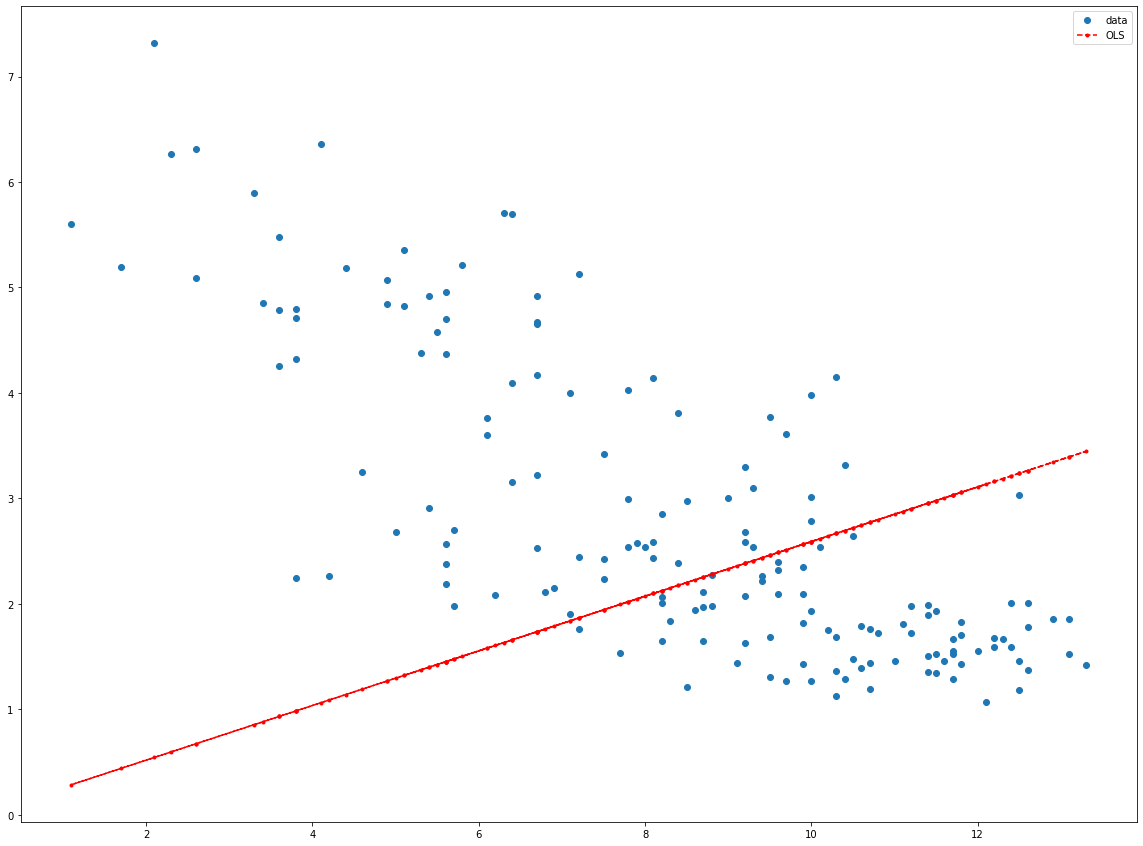

In [50]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(X, y, 'o', label='data')
ax.plot(X, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')

In [51]:
fig.savefig('7.jpg', dpi=600)

In [52]:
# Machine Learning

In [53]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [54]:
xs = df['Mean years of schooling, male (years) 2013']
ys = df['GDP per capita (current US$) 2013']

In [55]:
xs

0       5.1
1       9.5
2       7.8
3       9.6
4      10.8
       ... 
159     5.7
160     3.8
161     7.2
162     7.8
163    12.1
Name: Mean years of schooling, male (years) 2013, Length: 164, dtype: float64

In [56]:
ys

0        637.165523
1       4413.060861
2       5499.581487
3      13080.254732
4       3838.185801
           ...     
159     1886.671896
160     1607.152365
161     1878.907001
162     1430.000818
163    21973.000000
Name: GDP per capita (current US$) 2013, Length: 164, dtype: float64

In [57]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 1ms/step - loss: 393222180.5714
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 425288182.8571
Epoch 3/500
6/6 [==============================] - 0s 993us/step - loss: 2653294208.0000
Epoch 4/500
6/6 [==============================] - 0s 1ms/step - loss: 561513952.0000
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 356701339.4286
Epoch 6/500
6/6 [==============================] - 0s 800us/step - loss: 377332534.8571
Epoch 7/500
6/6 [==============================] - 0s 997us/step - loss: 1291283986.2857
Epoch 8/500
6/6 [==============================] - 0s 2ms/step - loss: 643866299.4286
Epoch 9/500
6/6 [==============================] - 0s 1ms/step - loss: 355466742.8571
Epoch 10/500
6/6 [==============================] - 0s 997us/step - loss: 285334465.1429
Epoch 11/500
6/6 [==============================] - 0s 2ms/step - loss: 360144342.8571
Epoch 12/500
6/6 [========================

Epoch 94/500
6/6 [==============================] - 0s 1ms/step - loss: 375328850.2857
Epoch 95/500
6/6 [==============================] - 0s 798us/step - loss: 495235520.0000
Epoch 96/500
6/6 [==============================] - 0s 1ms/step - loss: 533142637.7143
Epoch 97/500
6/6 [==============================] - 0s 997us/step - loss: 314306299.4286
Epoch 98/500
6/6 [==============================] - 0s 798us/step - loss: 841640731.4286
Epoch 99/500
6/6 [==============================] - 0s 997us/step - loss: 735442112.0000
Epoch 100/500
6/6 [==============================] - 0s 1ms/step - loss: 809107501.7143
Epoch 101/500
6/6 [==============================] - 0s 997us/step - loss: 278067853.7143
Epoch 102/500
6/6 [==============================] - 0s 1ms/step - loss: 1299830409.1429
Epoch 103/500
6/6 [==============================] - 0s 999us/step - loss: 270633440.0000
Epoch 104/500
6/6 [==============================] - 0s 1ms/step - loss: 791981650.2857
Epoch 105/500
6/6 [======

6/6 [==============================] - 0s 997us/step - loss: 344652114.2857
Epoch 186/500
6/6 [==============================] - 0s 1ms/step - loss: 409563670.8571
Epoch 187/500
6/6 [==============================] - 0s 798us/step - loss: 313714340.5714
Epoch 188/500
6/6 [==============================] - 0s 997us/step - loss: 716119524.5714
Epoch 189/500
6/6 [==============================] - 0s 997us/step - loss: 267219213.7143
Epoch 190/500
6/6 [==============================] - 0s 1ms/step - loss: 324689117.7143
Epoch 191/500
6/6 [==============================] - 0s 797us/step - loss: 417751830.8571
Epoch 192/500
6/6 [==============================] - 0s 997us/step - loss: 618480224.0000
Epoch 193/500
6/6 [==============================] - 0s 997us/step - loss: 325237344.0000
Epoch 194/500
6/6 [==============================] - 0s 798us/step - loss: 276590523.4286
Epoch 195/500
6/6 [==============================] - 0s 997us/step - loss: 322375634.2857
Epoch 196/500
6/6 [=========

6/6 [==============================] - 0s 1ms/step - loss: 325635424.0000
Epoch 277/500
6/6 [==============================] - 0s 997us/step - loss: 1050672420.5714
Epoch 278/500
6/6 [==============================] - 0s 997us/step - loss: 342281124.5714
Epoch 279/500
6/6 [==============================] - 0s 1ms/step - loss: 256887840.0000
Epoch 280/500
6/6 [==============================] - 0s 993us/step - loss: 283706772.5714
Epoch 281/500
6/6 [==============================] - 0s 997us/step - loss: 301554482.2857
Epoch 282/500
6/6 [==============================] - 0s 799us/step - loss: 475207254.8571
Epoch 283/500
6/6 [==============================] - 0s 798us/step - loss: 327664754.2857
Epoch 284/500
6/6 [==============================] - 0s 997us/step - loss: 352946756.5714
Epoch 285/500
6/6 [==============================] - 0s 798us/step - loss: 270297600.0000
Epoch 286/500
6/6 [==============================] - 0s 994us/step - loss: 344455986.2857
Epoch 287/500
6/6 [========

6/6 [==============================] - 0s 1ms/step - loss: 381851789.7143
Epoch 368/500
6/6 [==============================] - 0s 997us/step - loss: 399899593.1429
Epoch 369/500
6/6 [==============================] - 0s 1ms/step - loss: 440096731.4286
Epoch 370/500
6/6 [==============================] - 0s 997us/step - loss: 551742464.0000
Epoch 371/500
6/6 [==============================] - 0s 1ms/step - loss: 338500466.2857
Epoch 372/500
6/6 [==============================] - 0s 1ms/step - loss: 303727670.8571
Epoch 373/500
6/6 [==============================] - 0s 997us/step - loss: 509291076.5714
Epoch 374/500
6/6 [==============================] - 0s 1ms/step - loss: 310018944.0000
Epoch 375/500
6/6 [==============================] - 0s 997us/step - loss: 238802694.8571
Epoch 376/500
6/6 [==============================] - 0s 1ms/step - loss: 1027990025.1429
Epoch 377/500
6/6 [==============================] - 0s 997us/step - loss: 377867529.1429
Epoch 378/500
6/6 [================

6/6 [==============================] - 0s 798us/step - loss: 350080352.0000
Epoch 459/500
6/6 [==============================] - 0s 798us/step - loss: 324131757.7143
Epoch 460/500
6/6 [==============================] - 0s 799us/step - loss: 255383085.7143
Epoch 461/500
6/6 [==============================] - 0s 1ms/step - loss: 368540256.0000
Epoch 462/500
6/6 [==============================] - 0s 798us/step - loss: 517000013.7143
Epoch 463/500
6/6 [==============================] - 0s 796us/step - loss: 308505394.2857
Epoch 464/500
6/6 [==============================] - 0s 797us/step - loss: 399505577.1429
Epoch 465/500
6/6 [==============================] - 0s 797us/step - loss: 644344813.7143
Epoch 466/500
6/6 [==============================] - 0s 997us/step - loss: 384180269.7143
Epoch 467/500
6/6 [==============================] - 0s 997us/step - loss: 574416329.1429
Epoch 468/500
6/6 [==============================] - 0s 798us/step - loss: 410908050.2857
Epoch 469/500
6/6 [=======

In [58]:
print(model.predict([10.0]))

[[17507.783]]
